# IE 598 Week 7 Homework - Random Forest Classification

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import time

In [2]:
# Same dataset as last week
ccdefault = pd.read_csv('ccdefault.csv')
ccdefault.drop('ID', axis=1, inplace=True)
ccdefault.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
# Split data and label
X = ccdefault[ccdefault.columns[:-1]]
y = ccdefault['DEFAULT']
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [4]:
# Split original data into train data and test data with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (27000, 23)
X_test:  (3000, 23)
y_train:  (27000,)
y_test:  (3000,)


In [5]:
# GridSearchCV to find the best RF model parameters
# This block may take a long time
parameters = {'n_estimators':[100, 200, 300, 400, 500],
              'criterion':['gini', 'entropy'], 
              'max_depth':[100, 200, 300, 400, 500]}

rf_model = RandomForestClassifier()
gs = GridSearchCV(rf_model, parameters, cv=10)
gs.fit(X_train, y_train)
print('10-fold Cross Validation: ')
print("Tuned Random Forest Parameter: {}".format(gs.best_params_))
print("Tuned Random Forest Accuracy: {}".format(gs.best_score_))

10-fold Cross Validation: 
Tuned Random Forest Parameter: {'criterion': 'entropy', 'max_depth': 200, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8178518518518518


In [6]:
# Result on the test set
rf_best = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=200)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
print('Accuracy on the test set: ', rf_best.score(X_test, y_test))

Accuracy on the test set:  0.8153333333333334


In [8]:
importances=rf_best.feature_importances_
importances

array([0.0628275 , 0.01231127, 0.02097974, 0.01361872, 0.06639307,
       0.08048552, 0.03777202, 0.02074351, 0.0223408 , 0.01995353,
       0.01465586, 0.06463493, 0.05743397, 0.05379258, 0.05334758,
       0.05180215, 0.05318987, 0.0532644 , 0.0519908 , 0.04825446,
       0.04538579, 0.04660526, 0.04821667])

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2336
           1       0.66      0.35      0.46       664

    accuracy                           0.82      3000
   macro avg       0.75      0.65      0.67      3000
weighted avg       0.80      0.82      0.79      3000



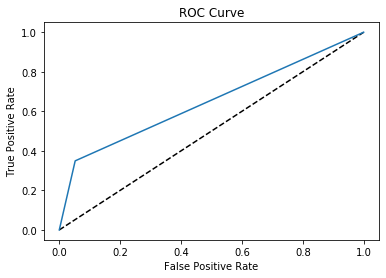

In [10]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [11]:
# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred)))

AUC: 0.6485857814820927


In [12]:
print("My name is Zizheng Zhang")
print("My NetID is: zizheng2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zizheng Zhang
My NetID is: zizheng2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
